In [9]:
!pip install tensorflow.keras

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 5.6 MB/s eta 0:01:10
   ---------------------------------------- 1.8/390.3 MB 5.6 MB/s eta 0:01:10
   ---------------------------------------- 3.1/390.3 MB 5.8 MB/s eta 0:01:08
   ---------------------------------------- 4.2/390.3 MB 5.7 MB/s eta 0:01:08
    --------------------------------------- 5.2/390.3 MB 5.7 MB/s eta 0:01:08
    --------------------------------------- 6.6/390.3 MB 5.8 MB/s eta 0:01:07
    --------------------------------------- 7.9/390.3 MB 5.8 MB/s eta 0:01:06
    --------------------------------------- 9.2/390.3 MB 5.8 MB/s eta 0:01:06
   - -------------------------------------- 10.2/390.3 MB 5.8 MB/s eta 0:01:05
   - -------------------------------------- 11.5/390.3 MB 5.9 MB/s eta 0:01:05
   - -------------------------------------- 12.6/390.3 MB 5.8 MB/s eta 0:01:06
   - -------------------------------------- 13.6/390.3 MB 5.7 MB/s e

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [13]:
data = pd.read_csv('pollution_dataset.csv')

In [15]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [17]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [23]:
data['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [27]:
le = LabelEncoder()

le.fit_transform(data['Air Quality'])

array([2, 2, 2, ..., 2, 0, 2])

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [31]:
X = data.drop('Air Quality', axis=1)

In [33]:
Y = data['Air Quality']

In [35]:
Y_encoded = le.fit_transform(Y)

In [37]:
Y_one_hot = to_categorical(Y_encoded)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train.shape[1]

9

In [55]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

model.add(Dense(y_train.shape[1], activation='softmax'))

C:\Users\boris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5430 - loss: 1.1557 - val_accuracy: 0.8125 - val_loss: 0.4656
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8441 - loss: 0.4096 - val_accuracy: 0.8813 - val_loss: 0.3190
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8876 - loss: 0.3053 - val_accuracy: 0.8863 - val_loss: 0.2747
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9110 - loss: 0.2461 - val_accuracy: 0.9050 - val_loss: 0.2473
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9152 - loss: 0.2212 - val_accuracy: 0.9038 - val_loss: 0.2482
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9305 - loss: 0.1986 - val_accuracy: 0.9087 - val_loss: 0.2092
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9285 - loss: 0.1851 - val_accuracy: 0.9125 - val_loss: 0.2062
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9307 - loss: 0.1784 - val_accuracy: 0.

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1226
Test Accuracy: 0.9500


In [63]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [67]:
predicted_labels = le.inverse_transform(predicted_classes)
true_labels = le.inverse_transform(true_classes)

In [69]:
print(f"True Labels: {true_labels[:10]}")
print(f"Predicted Labels: {predicted_labels[:10]}")

True Labels: ['Hazardous' 'Good' 'Moderate' 'Hazardous' 'Good' 'Hazardous' 'Good'
 'Good' 'Good' 'Moderate']
Predicted Labels: ['Hazardous' 'Good' 'Moderate' 'Hazardous' 'Good' 'Hazardous' 'Good'
 'Good' 'Good' 'Moderate']


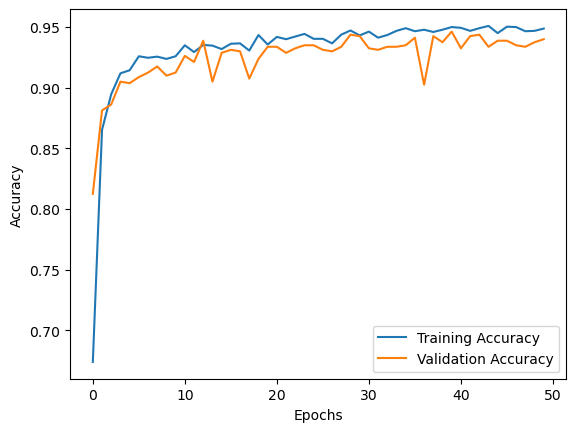

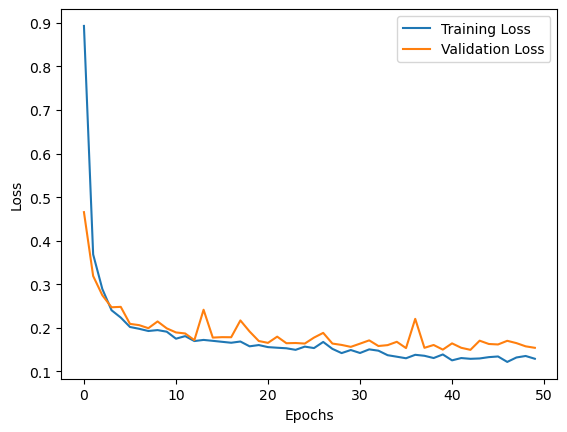

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()